In [1]:
## SETUP
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from nltk import word_tokenize, FreqDist
import seaborn as sns

In [2]:
date=pd.read_csv('D:\\NLP\\dataset\\AppsData.csv')
date.head()

,Unnamed: 0,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency
0,0,Slice It All!,com.tummygames.sliceit,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/UXBR3KEH...,VOODOO,VOODOO,FREE,0.0,True,Tap to slice!,3.9,3.866412,NaN
1,1,Hair Challenge,com.Upperpik.HairChallenge,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/14aR2z00...,Rollic Games,Rollic+Games,FREE,0.0,True,Grow your hair longer and win this super fun h...,3.7,3.683039,NaN
2,2,Bridge Race,com.Garawell.BridgeRace,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/hn0W0fK3...,Supersonic Studios LTD,Supersonic+Studios+LTD,FREE,0.0,True,Build bridges till the winning stage!,3.5,3.461937,NaN
3,3,Dice Push,com.jakob.pushdice,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/jqHJnmXg...,VOODOO,VOODOO,FREE,0.0,True,Play against millions of players and push them...,2.6,2.636792,NaN
4,4,Make It Fly!,com.make.it.fly,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/ydbOTwDq...,TapNice,TapNice,FREE,0.0,True,Let your imagination and creativity fly wild! ...,4.1,4.107143,NaN


In [5]:
# Analiza comparativa la score la free/ paid apps
# prezenta buguri => nota mica
df = pd.DataFrame(date, columns=["priceText","scoreText"])
#numarare 
l=df['scoreText']
AppGratis = FreqDist(l)
# conversie in pandas 
AppGratis=pd.Series(dict(AppGratis))

In [6]:
#selectare doar aplicatii gratis
gratis=date.loc[date['priceText']=="FREE",['scoreText']]
l=gratis['scoreText']
AppGratis = FreqDist(l)
AppGratis=pd.Series(dict(AppGratis))
numarare=list(AppGratis.values)
scor=list(AppGratis.index)
print(scor)
print(numarare)

[3.9, 3.7, 3.5, 2.6, 4.1, 4.5, 4.3, 4.4, 3.8, 4.0, 4.2, 4.6, 3.4, 4.7, 3.6, 3.3, 4.8, 3.2, 4.9]
[10, 10, 3, 2, 23, 21, 27, 21, 7, 11, 20, 24, 6, 5, 4, 1, 3, 1, 1]


In [7]:
#selectare doar aplicatii contra Cost
contraCost=date.loc[date['priceText']!="FREE",['scoreText']]
l=contraCost['scoreText']
AppcuPlata = FreqDist(l)
AppcuPlata=pd.Series(dict(AppcuPlata))
numar=list(AppcuPlata.values)
scorAcordat=list(AppcuPlata.index)
print(scorAcordat)
print(numar)

[4.6, 4.8, 4.3, 4.7, 3.7, 4.5, 4.4, 4.1, 4.2, 3.8, 3.4, 4.9, 3.9, 4.0, 3.6, 3.0, 3.2]
[22, 19, 25, 29, 6, 30, 22, 8, 18, 4, 2, 6, 2, 4, 1, 1, 1]


Text(0.5, 0, 'Scor')

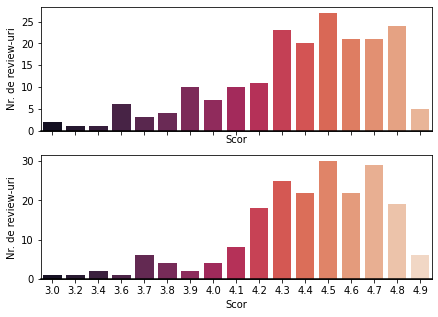

In [8]:
f, (ax1,ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

sns.barplot(x=scor, y=numarare, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Nr. de review-uri")
ax1.set_xlabel("Scor")
sns.barplot(x=scorAcordat, y=numar, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Nr. de review-uri")
ax2.set_xlabel("Scor")

In [9]:
# Analiza comparativa la cantitatea de buguri 
# 0->trash 1->bug 2->feature
review=pd.read_csv('D:\\NLP\\dataset\\Reviews_with_label.csv')
review.head()

,Unnamed: 0,userName,score,url,text,thumbsUp,App_Id,label
0,0,Loquat,5,https://play.google.com/store/apps/details?id=...,"[ 'good ' , 'game ' ]",1,age.of.civilizations2.jakowski.lukasz,0.0
1,1,Skadoosh 69,5,https://play.google.com/store/apps/details?id=...,"[ 'honestli ' , 'favorit ' , 'game ' , 'play '...",0,age.of.civilizations2.jakowski.lukasz,0.0
2,2,neki0 playz,5,https://play.google.com/store/apps/details?id=...,"[ 'great ' , 'game ' , 'bit ' , 'would ' , 're...",1,age.of.civilizations2.jakowski.lukasz,0.0
3,3,sans 45334,5,https://play.google.com/store/apps/details?id=...,[ 'god ' ],0,age.of.civilizations2.jakowski.lukasz,0.0
4,4,Kimmy D,5,https://play.google.com/store/apps/details?id=...,[ 'ancient ' ],0,age.of.civilizations2.jakowski.lukasz,0.0


In [12]:
label=review['label']
#date null
print(label.isna().sum())
# sterg datele null
label=label.dropna()
#numarare 
statistica = FreqDist(label)
# conversie in pandas 
statistica=pd.Series(dict(statistica))
statistica=list(statistica.values)
nume=['Trash','Bug', 'Feature']
colors=("orange","brown","cyan")
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

106394


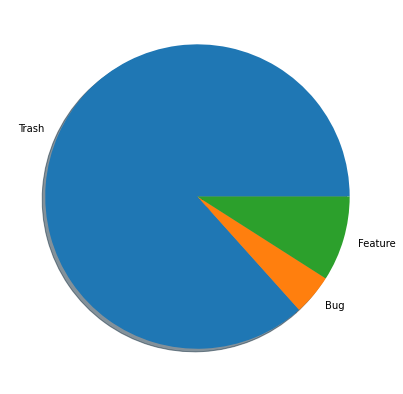

In [13]:
#pie
fig = plt.figure(figsize =(10, 7))
plt.pie(statistica,labels=nume,shadow=True)
plt.show()

In [23]:
# Aplicatii cu cele mai populare review-uri
date=pd.read_csv('D:\\NLP\\dataset\\googleplaystore_user_reviews.csv')
X= date['App'].values
all_fdist = FreqDist(X).most_common(20) #aplicatiile cu cele mai multe review-uri
all_fdist = pd.Series(dict(all_fdist)) #conversie in pandas


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

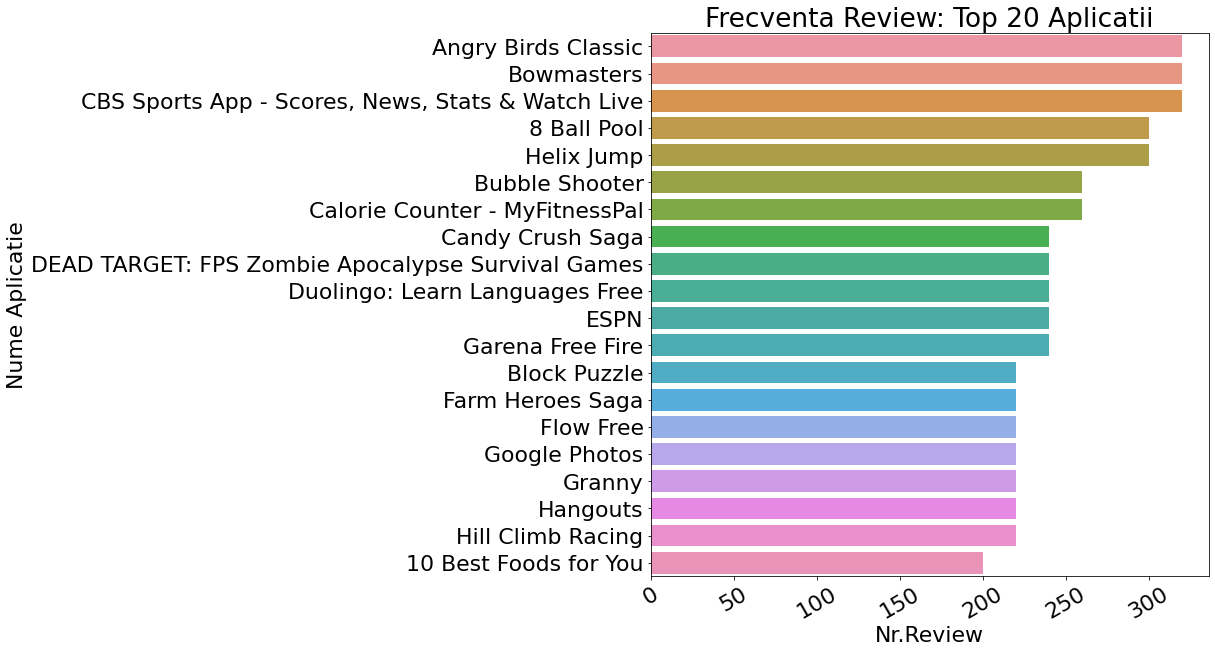

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(y=all_fdist.index, x=all_fdist.values,orient='h', ax=ax)
plt.title("Frecventa Review: Top 20 Aplicatii")
plt.xlabel("Nr.Review")
plt.ylabel("Nume Aplicatie")
plt.rcParams.update({'font.size': 22})
plt.xticks(rotation=30)